# Import the package

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import strym
from strym import strymread
import seaborn as sea
from strym import phasespace
import numpy as np
import tables
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
DataFolder = "/home/ivory/CyverseData/JmscslgroupData/PandaData/2020_03_03/"
import glob
csvlist = glob.glob(DataFolder+"*.csv")
dbcfile = '/home/ivory/VersionControl/Jmscslgroup/strym/examples/newToyotacode.dbc'

In [3]:
rlist = []
for csv in csvlist:
    r = strymread(csvfile=csv, dbcfile=dbcfile)
    rlist.append(r)

In [5]:
df = rlist[0].acc_state()

# Let's look at the ACC state

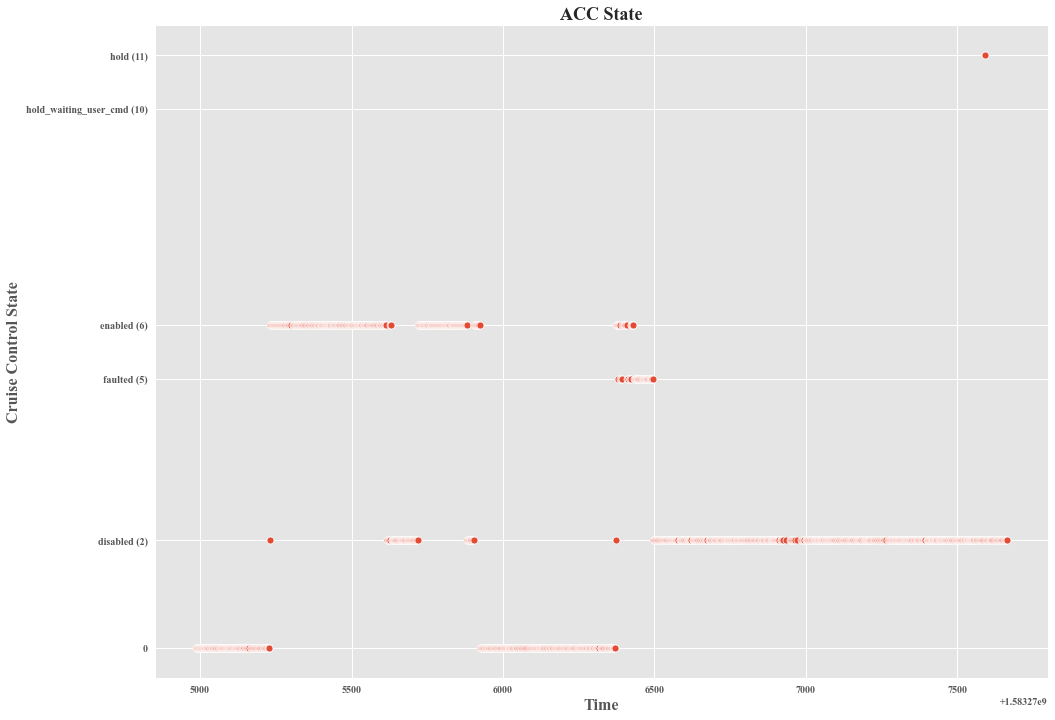

In [11]:
df.loc[(df.Message == 'disabled'),'Message']=2
df.loc[(df.Message == 'hold'),'Message'] = 11
df.loc[(df.Message == 'hold_waiting_user_cmd'),'Message'] = 10
df.loc[(df.Message == 'enabled'),'Message'] = 6
df.loc[(df.Message == 'faulted'),'Message'] = 5

plt.rcParams["figure.figsize"] = (16,12)
sea.scatterplot(x='Time', y='Message', data=df)
plt.yticks([0, 2, 5, 6, 10, 11], ['0', 'disabled (2)', 'faulted (5)', 'enabled (6)', 'hold_waiting_user_cmd (10)', 'hold (11)'])
plt.title("ACC State",  fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Cruise Control State', fontsize=16)
plt.show()

# Let's look at ACC_CONTROL 's different components

## ACCEL_CMD

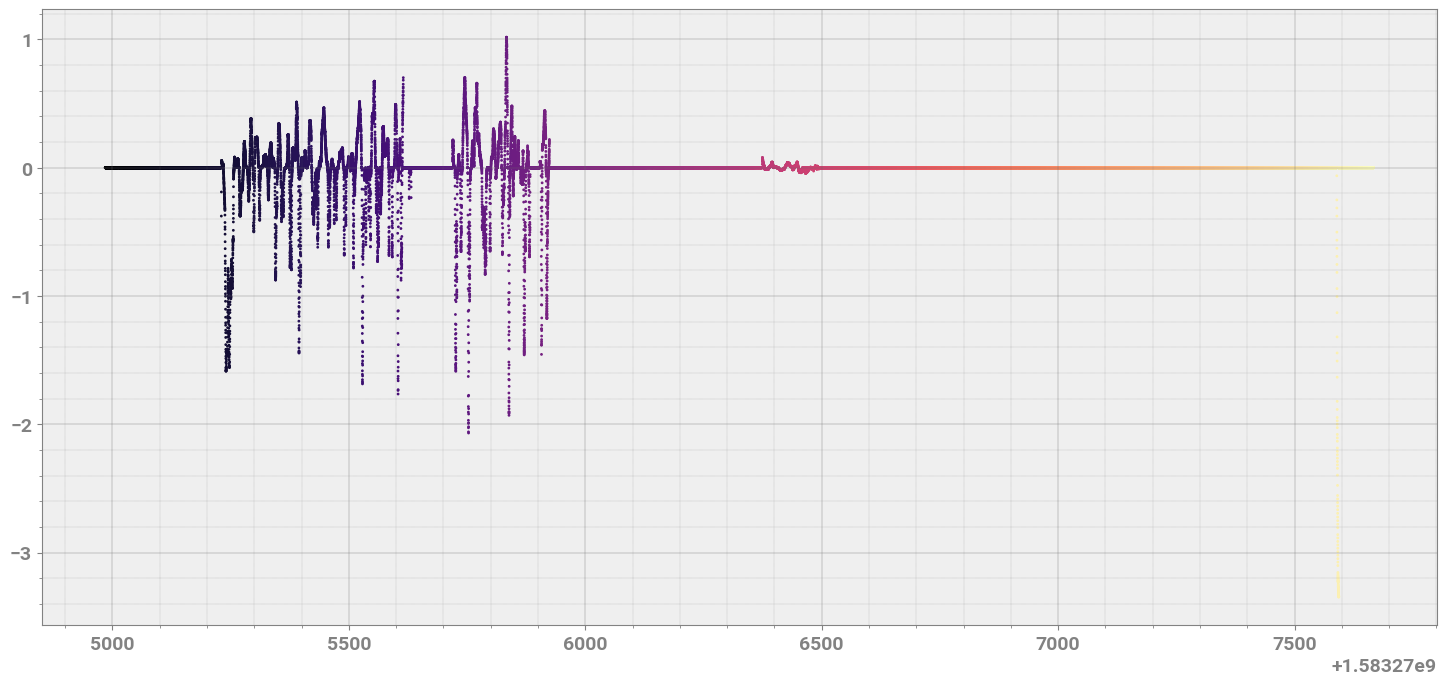

In [17]:
df_ACC = rlist[0].get_ts(msg = "ACC_CONTROL", signal="ACCEL_CMD")
fig, ax = strym.create_fig(1)
ax[0].scatter(x = df_ACC['Time'], y = df_ACC['Message'], s= 1, c=df_ACC['Time'], cmap='magma')
plt.show()

## SET_ME_X01
**Question: What does it mean?**

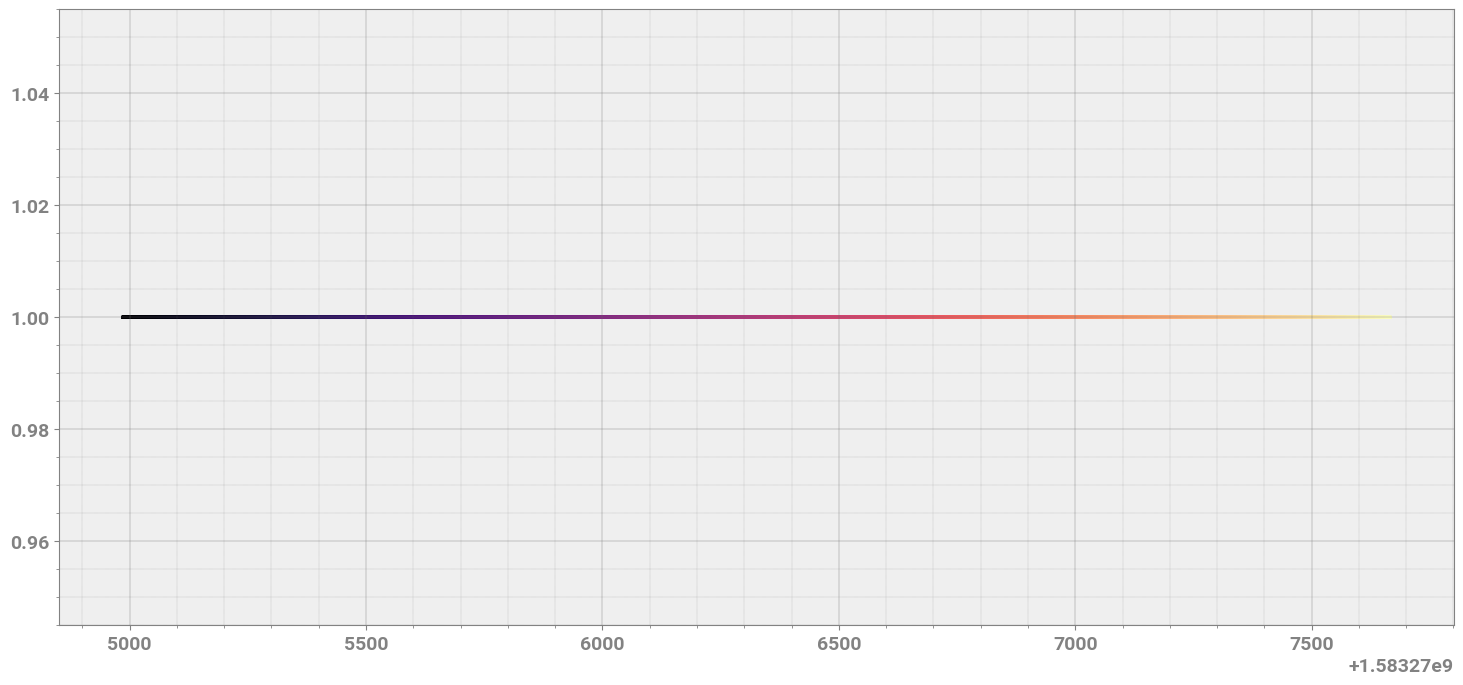

In [19]:
df_SETME = rlist[0].get_ts(msg = "ACC_CONTROL", signal="SET_ME_X01")
fig, ax = strym.create_fig(1)
ax[0].scatter(x = df_SETME['Time'], y = df_SETME['Message'], s= 1, c=df_SETME['Time'], cmap='magma')
plt.show()

## DISTANCE

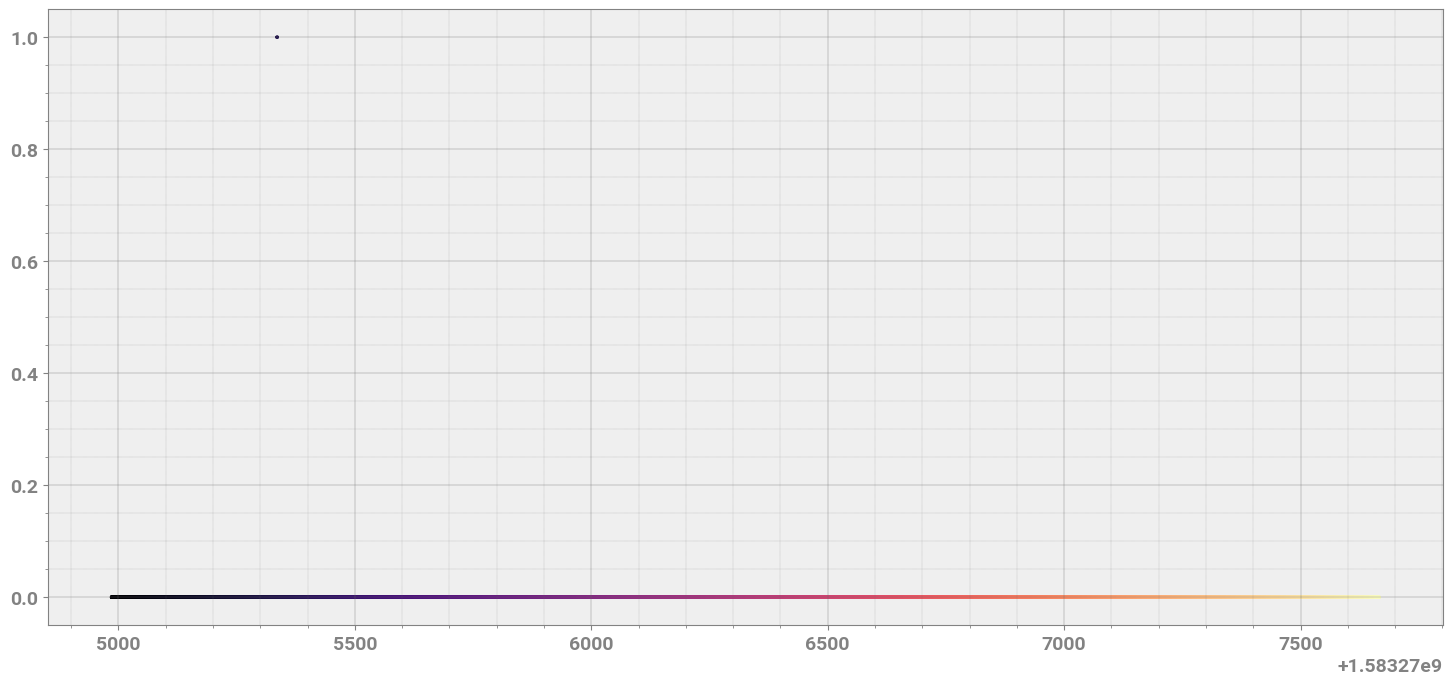

In [20]:
df_DISTANCE = rlist[0].get_ts(msg = "ACC_CONTROL", signal="DISTANCE")
fig, ax = strym.create_fig(1)
ax[0].scatter(x = df_DISTANCE['Time'], y = df_DISTANCE['Message'], s= 1, c=df_DISTANCE['Time'], cmap='magma')
plt.show()

## SET_ME_X3

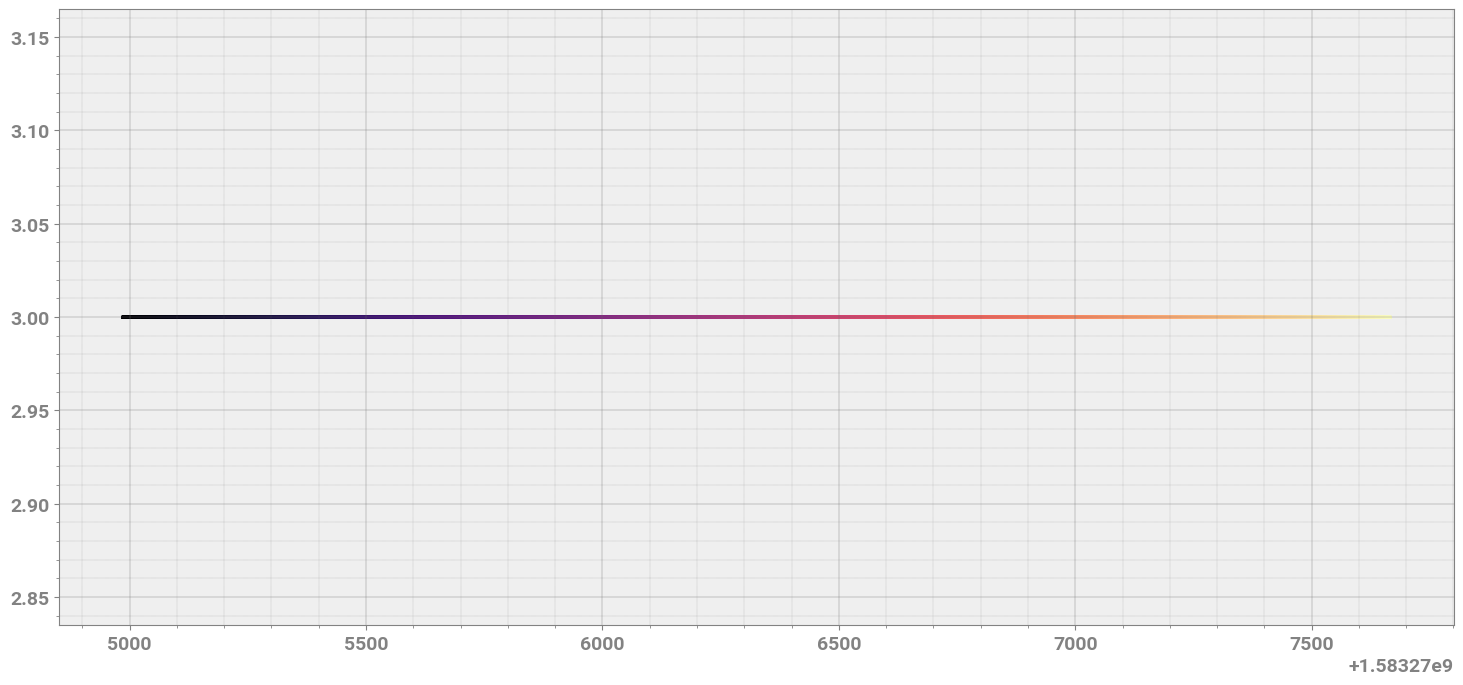

In [21]:
df_SET_ME_X3 = rlist[0].get_ts(msg = "ACC_CONTROL", signal="SET_ME_X3")
fig, ax = strym.create_fig(1)
ax[0].scatter(x = df_SET_ME_X3['Time'], y = df_SET_ME_X3['Message'], s= 1, c=df_SET_ME_X3['Time'], cmap='magma')
plt.show()

## SET_ME_1

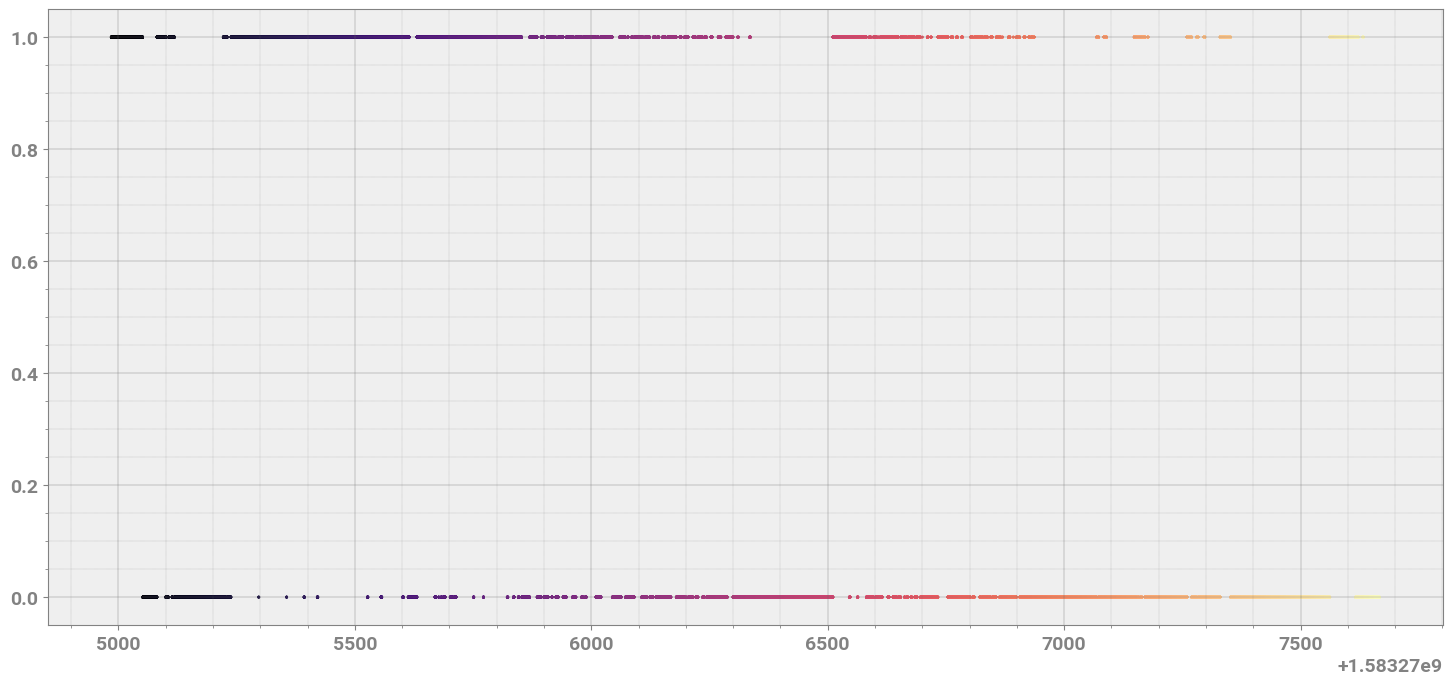

In [22]:
df_SET_ME_1 = rlist[0].get_ts(msg = "ACC_CONTROL", signal="SET_ME_1")
fig, ax = strym.create_fig(1)
ax[0].scatter(x = df_SET_ME_1['Time'], y = df_SET_ME_1['Message'], s= 1, c=df_SET_ME_1['Time'], cmap='magma')
plt.show()

## RELEASE_STANDSTILL

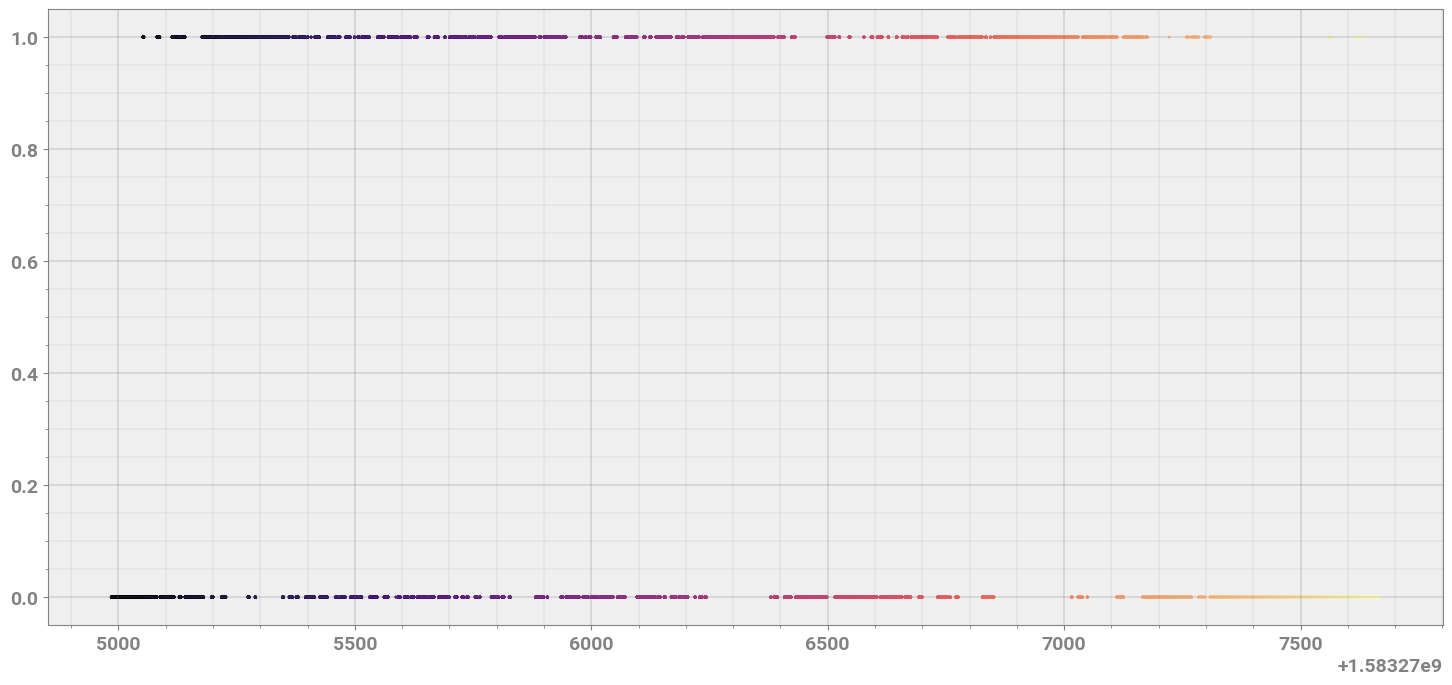

In [23]:
df_RELEASE_STANDSTILL = rlist[0].get_ts(msg = "ACC_CONTROL", signal="RELEASE_STANDSTILL")
fig, ax = strym.create_fig(1)
ax[0].scatter(x = df_RELEASE_STANDSTILL['Time'], y = df_RELEASE_STANDSTILL['Message'], s= 1, c=df_RELEASE_STANDSTILL['Time'], cmap='magma')
plt.show()

## CANCEL_REQ

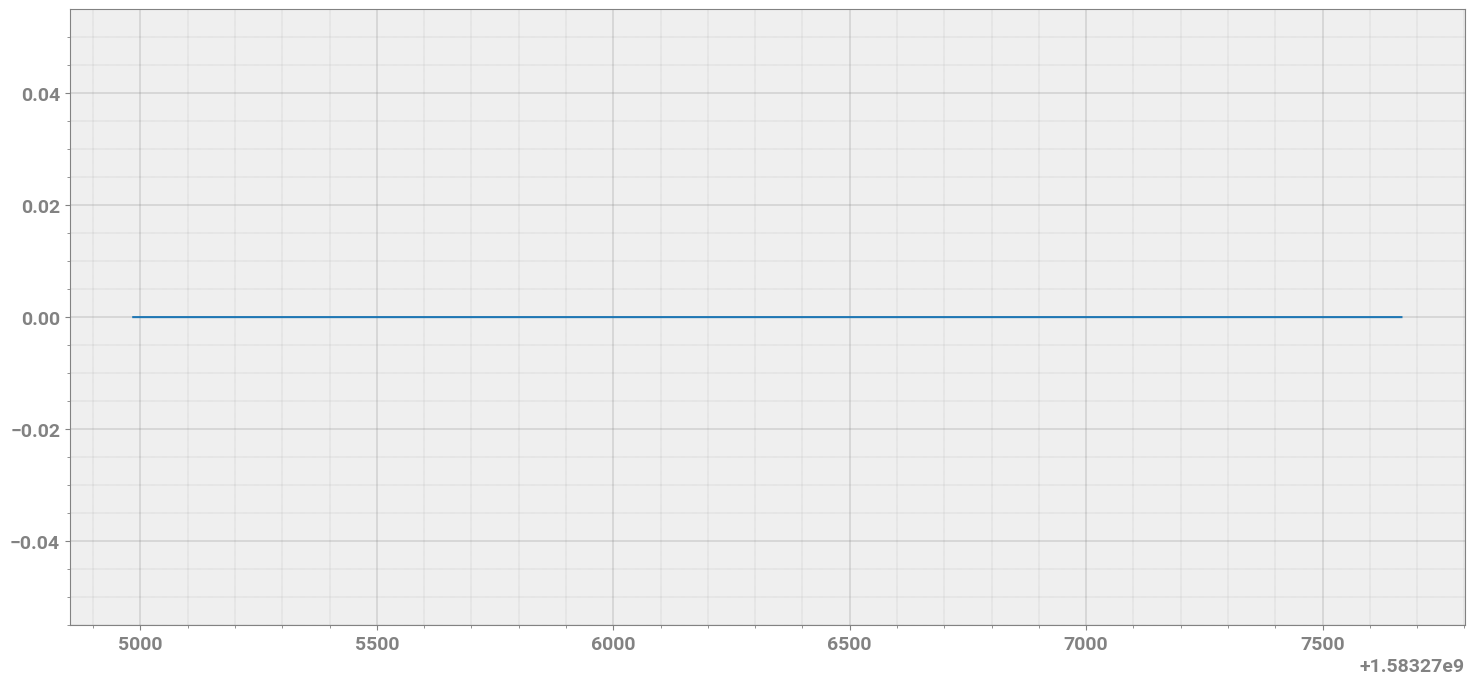

In [28]:
df_CANCEL_REQ = rlist[0].get_ts(msg = "ACC_CONTROL", signal="CANCEL_REQ")
fig, ax = strym.create_fig(1)
ax[0].plot(df_CANCEL_REQ['Time'],df_CANCEL_REQ['Message'])
plt.show()

# Now filter out the data for which ACC was one

In [29]:
df_subset_acc_on = rlist[0].msg_subset(conditions="cruise control on")

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


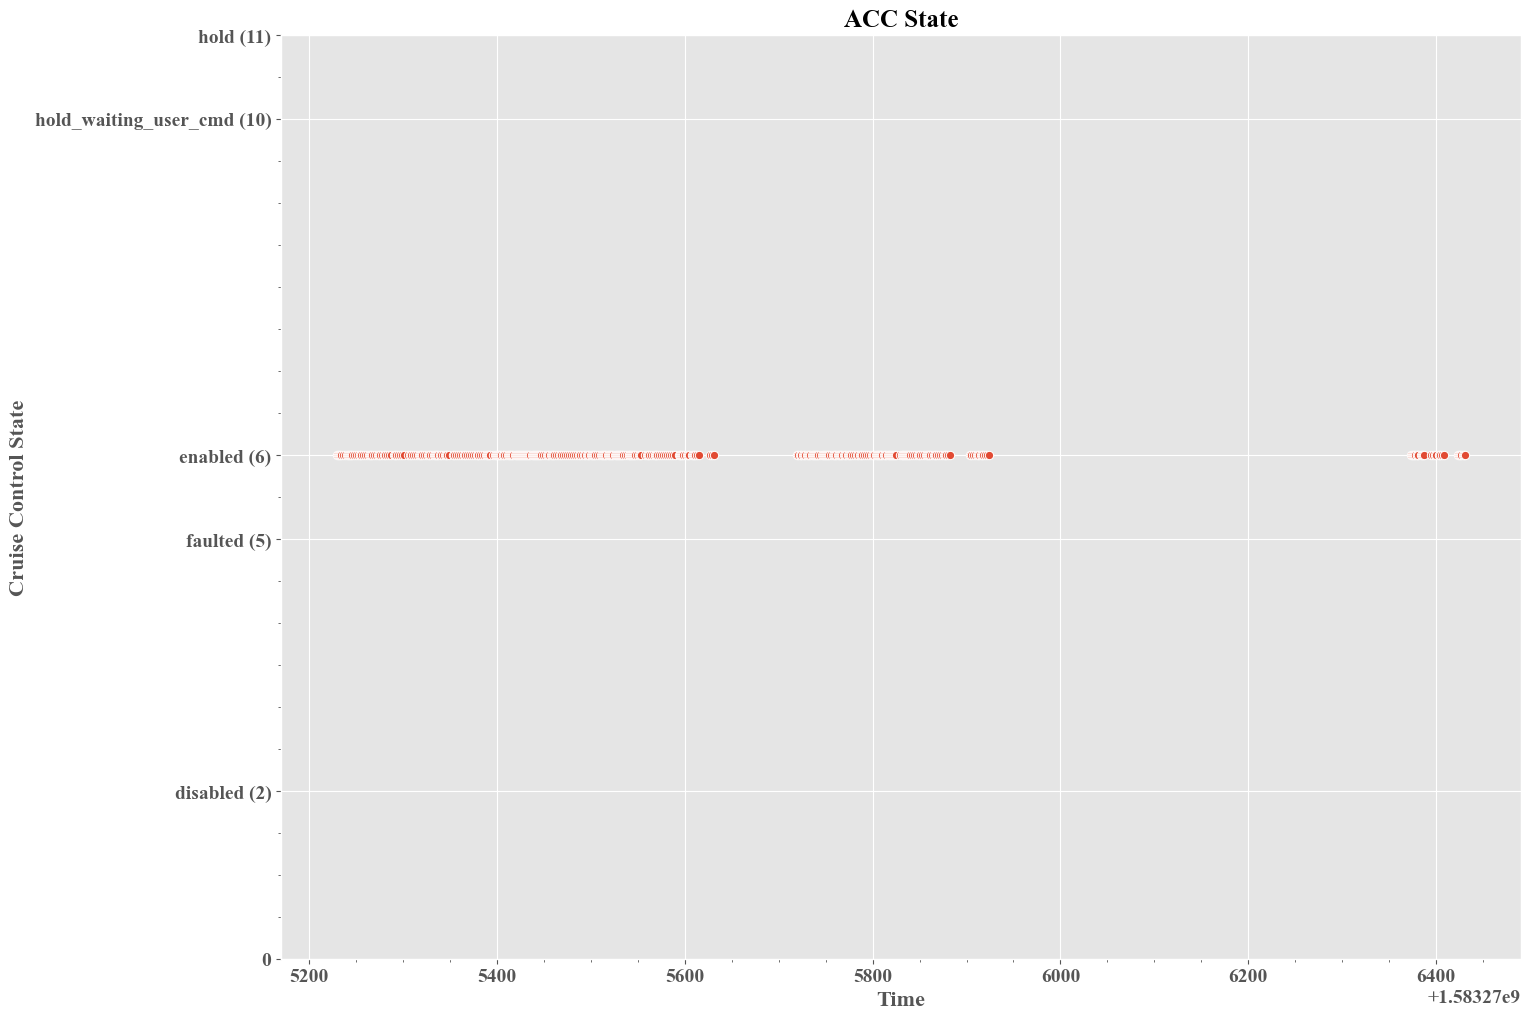

In [33]:
r_acc_on = strymread(df_subset_acc_on.dataframe, dbcfile = dbcfile)
acc_state = r_acc_on.acc_state()
acc_state.loc[(acc_state.Message == 'disabled'),'Message']=2
acc_state.loc[(acc_state.Message == 'hold'),'Message'] = 11
acc_state.loc[(acc_state.Message == 'hold_waiting_user_cmd'),'Message'] = 10
acc_state.loc[(acc_state.Message == 'enabled'),'Message'] = 6
acc_state.loc[(acc_state.Message == 'faulted'),'Message'] = 5

plt.rcParams["figure.figsize"] = (16,12)
sea.scatterplot(x='Time', y='Message', data=acc_state)
plt.yticks([0, 2, 5, 6, 10, 11], ['0', 'disabled (2)', 'faulted (5)', 'enabled (6)', 'hold_waiting_user_cmd (10)', 'hold (11)'])
plt.title("ACC State",  fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Cruise Control State', fontsize=16)
plt.show()

In [50]:
speed = r_acc_on.speed()
speed['Message'] = speed['Message']*0.277778
vehicle_to_vehicle_distance = r_acc_on.get_ts(msg="DSU_CRUISE", signal="LEAD_DISTANCE") 

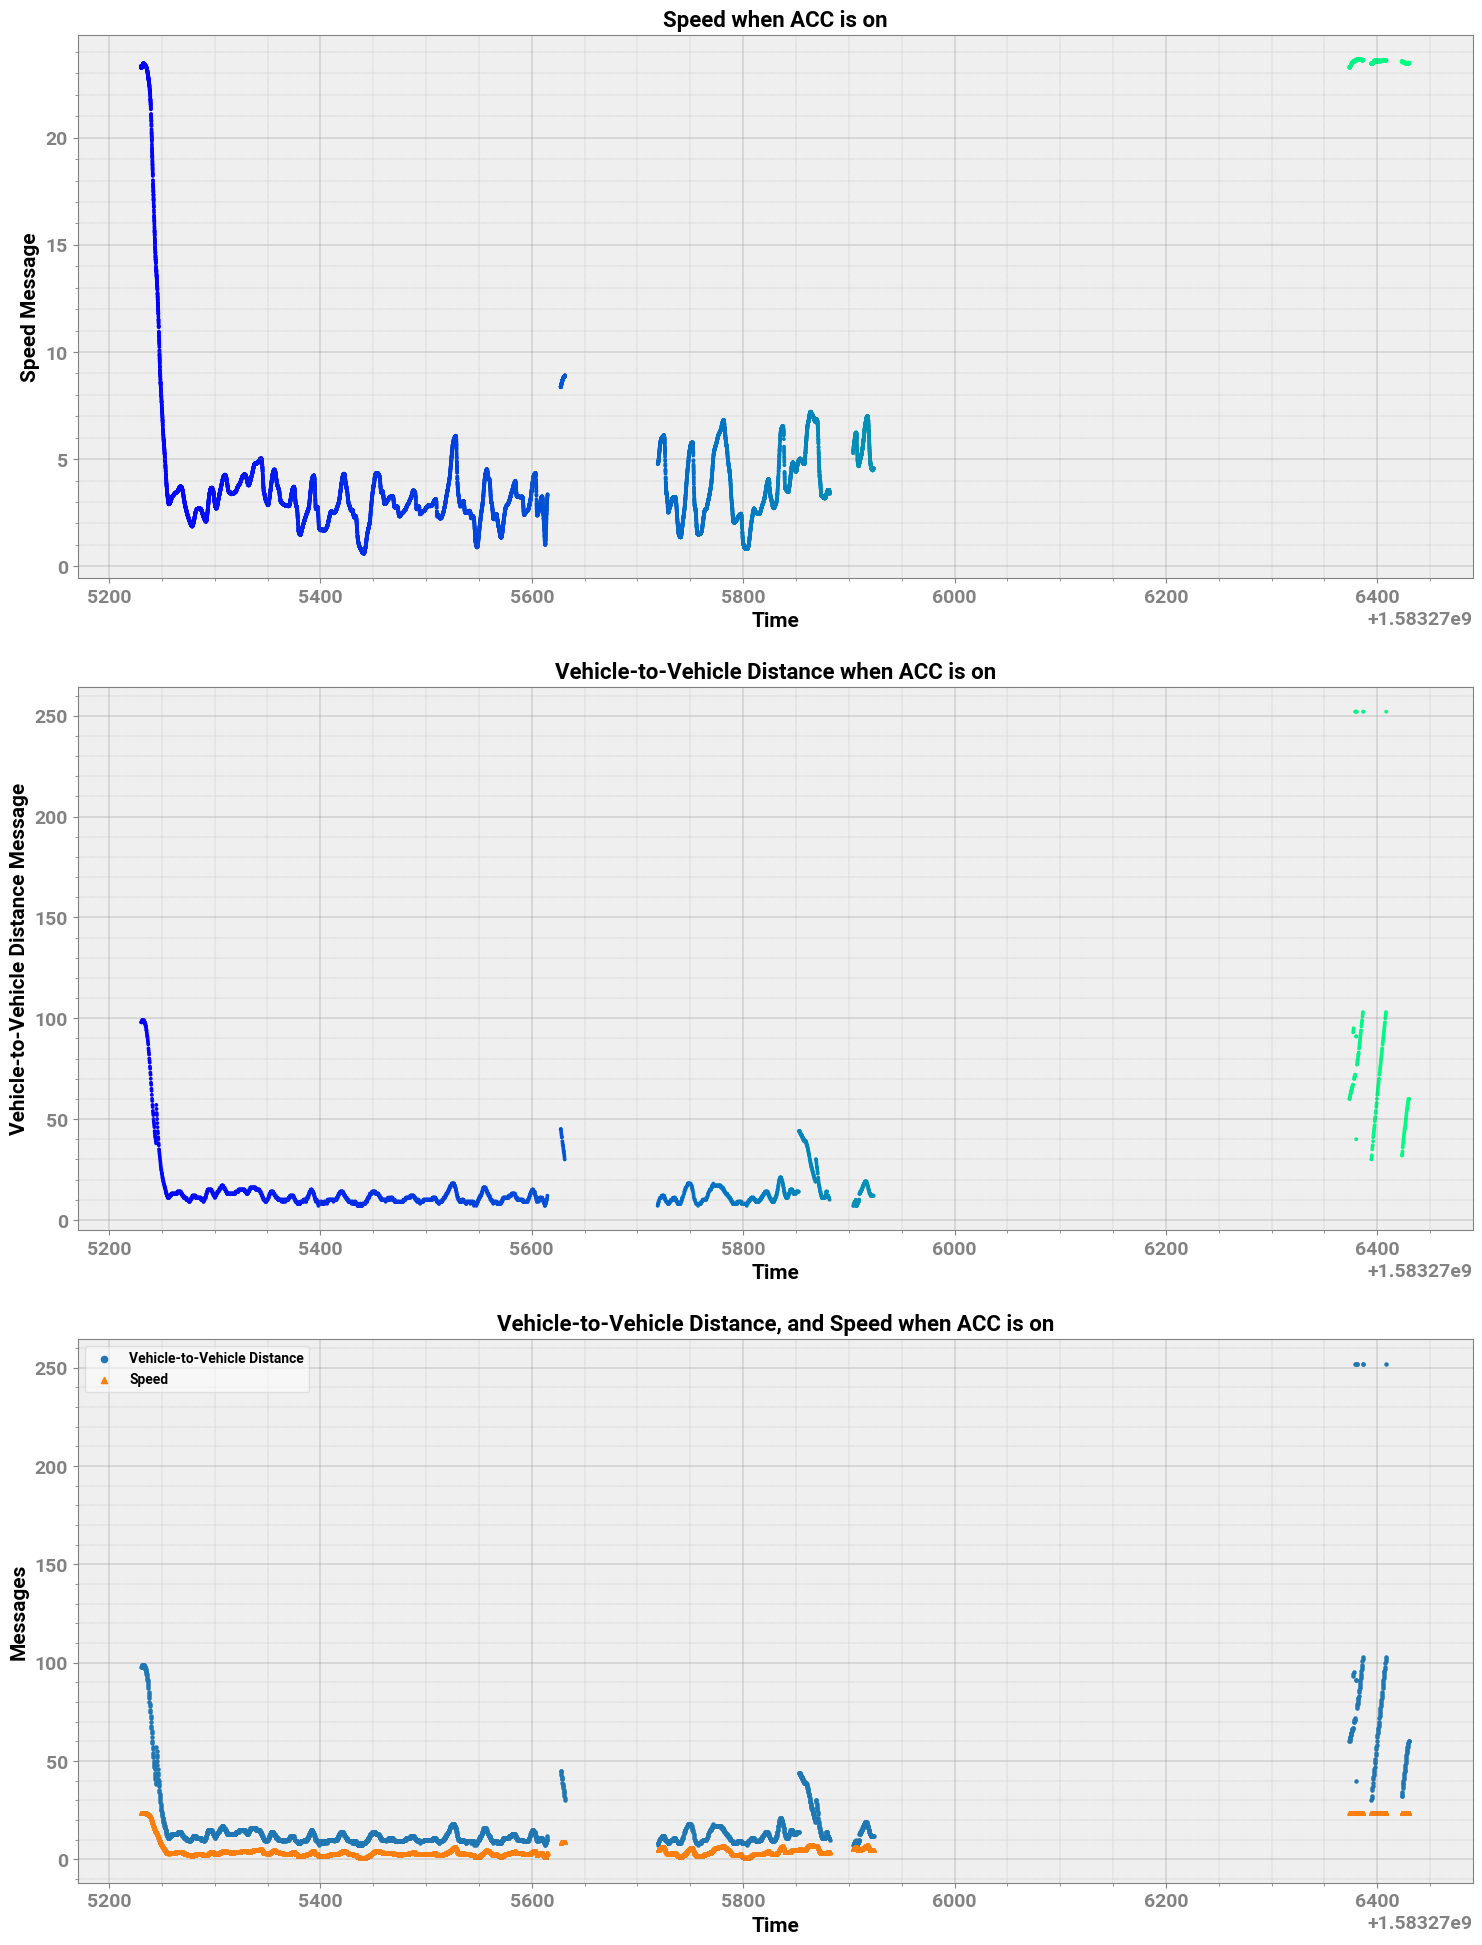

In [51]:
fig, ax = strym.create_fig(3)
ax[0].scatter(x = speed['Time'], y=speed['Message'], c=speed['Time'], cmap='winter', s= 3)
ax[0].set_title('Speed when ACC is on')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Speed Message')

ax[1].scatter(x = vehicle_to_vehicle_distance['Time'], y=vehicle_to_vehicle_distance['Message'], c=vehicle_to_vehicle_distance['Time'], cmap='winter', s= 3)
ax[1].set_title('Vehicle-to-Vehicle Distance when ACC is on')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Vehicle-to-Vehicle Distance Message')

ax[2].scatter(x = vehicle_to_vehicle_distance['Time'], y=vehicle_to_vehicle_distance['Message'], marker='o',  s= 5)
ax[2].scatter(x = speed['Time'], y=speed['Message'],  s= 5, marker='^')

ax[2].set_title('Vehicle-to-Vehicle Distance, and Speed when ACC is on')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Messages')
ax[2].legend(['Vehicle-to-Vehicle Distance', 'Speed'])
plt.show()